In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sktime.performance_metrics.forecasting import *
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.seasonal import MSTL
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
import feature

c:\Users\user\anaconda3\envs\sklearn-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
demand_train_df = pd.read_parquet('demand_train.parquet')
demand_test_df = pd.read_parquet('demand_test.parquet')

In [4]:
def print_metrics(y_true, y_pred, model_name):
    mae_ = mean_absolute_error(y_true, y_pred)
    rmse_ = mean_squared_error(y_true, y_pred, square_root = True)
    mape_ = mean_absolute_percentage_error(y_true, y_pred)
    smape_ = mean_absolute_percentage_error(y_true, y_pred, symmetric = True)
    mse_ = mean_squared_error(y_true, y_pred)

    dict_ = {'MAE': mae_, 'RMSE': rmse_,
             'MAPE': mape_, 'SMAPE': smape_ ,'MSE': mse_}

    df = pd.DataFrame(dict_, index = [model_name])
    return df.round(decimals = 2)

In [5]:
target_encoding(demand_train_df,demand_test_df)

In [7]:
df = demand_train_df.copy()
df.rename(columns={'timestamp': 'ds', 'demand': 'y'}, inplace=True)

In [9]:
model = Prophet(seasonality_mode='multiplicative')
model.add_country_holidays(country_name='US')
model.fit(df)

df = demand_test_df.copy()
df.rename(columns={'timestamp': 'ds', 'demand': 'y'}, inplace=True)
forecast = model.predict(df)

11:35:27 - cmdstanpy - INFO - Chain [1] start processing
11:39:17 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
print_metrics(df['y'],forecast['yhat'],'prophet')

,MAE,RMSE,MAPE,SMAPE,MSE
prophet,8.71,12.97,2.476591e+16,1.77,168.21


In [15]:
model.train_holiday_names

0               Martin Luther King Jr. Day
1                    Washington's Birthday
2                             Columbus Day
3                           New Year's Day
4                New Year's Day (Observed)
5                             Memorial Day
6     Juneteenth National Independence Day
7                         Independence Day
8                                Labor Day
9                             Veterans Day
10                 Veterans Day (Observed)
11                            Thanksgiving
12                           Christmas Day
dtype: object

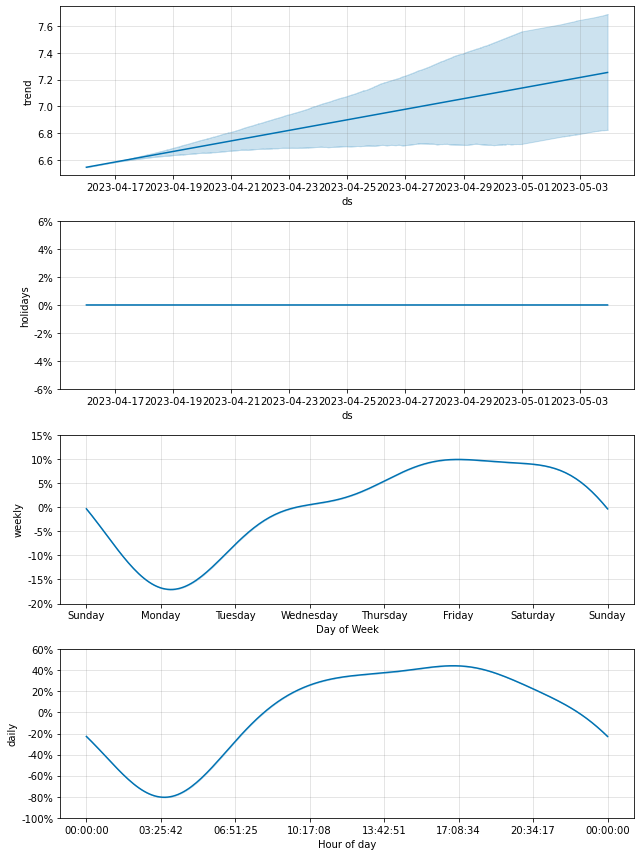

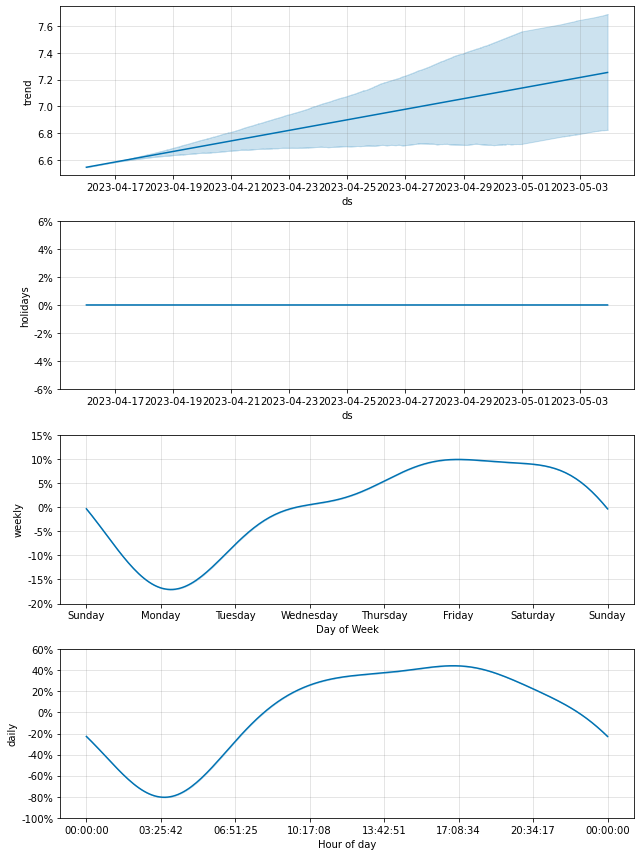

In [13]:
model.plot_components(forecast)


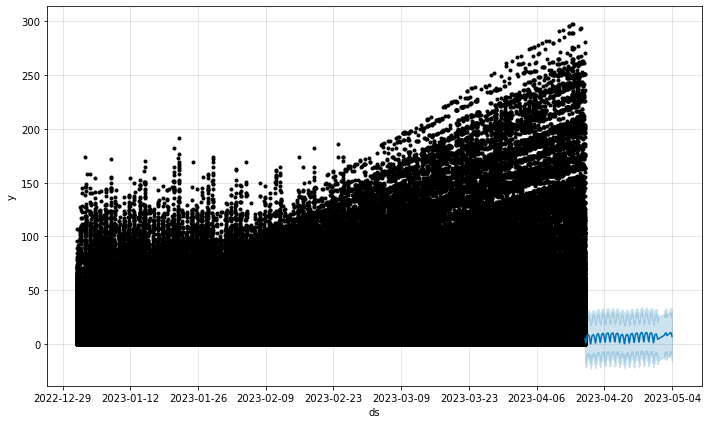

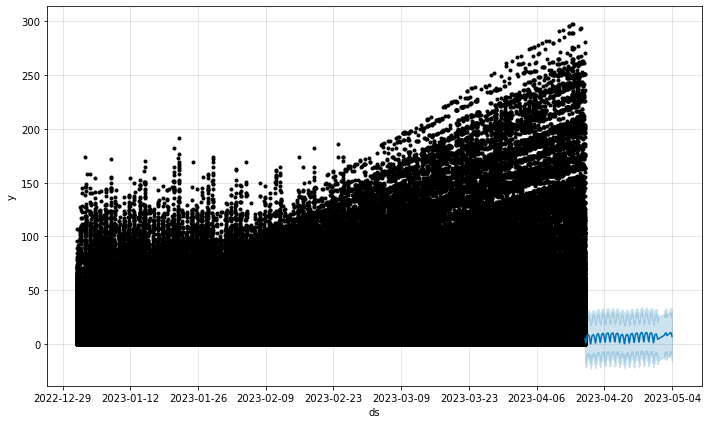

In [16]:
model.plot(forecast)

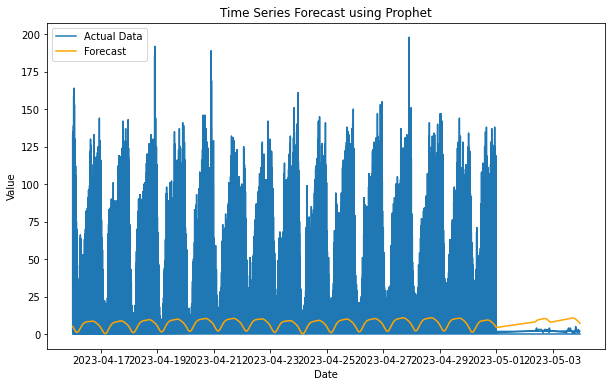

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
#plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.legend(loc='upper left')
plt.title('Time Series Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()